In [30]:
import numpy as np
from BPmodule.BPGen import GetInstance
from BPnumba.AGH import createAG,GASearch
import matplotlib.pyplot as plt
from numba.typed import List as NumbaList
from BPnumba.Poblation import CreateRotHPob,EvalPob
from BPnumba.BoxN import create_ItemBin,ItemBin,InstaceBoxes
from BPnumba.GeneticOperators import CrossOX,MutateInversion

In [31]:
BR1 = GetInstance("BR1")
contenedor = BR1[0]
DataSet = BR1[1][0]

In [33]:
n= len(DataSet)
pop= 20
maxItr=100
rot=6
pr_selec=0.85
pr_cruza = 0.75
pr_mutR=0.05
mutType=0
n,pop

(25, 20)

In [34]:
UBOXES = InstaceBoxes(DataSet)
Pob =   CreateRotHPob(pop =pop, ITEMS = UBOXES.copy(), rotType=rot)
EvalPob(Pob,UBOXES,contenedor,rot)
fi = NumbaList(np.zeros(maxItr,dtype=np.float64))
ind2 = GASearch(maxItr=maxItr,ps=pr_selec,pc=pr_cruza,pmr=pr_mutR,mut=mutType,bestfi=fi,pob=Pob,datos=UBOXES,contenedor=contenedor,rotType=rot )

In [37]:
UBOXES = InstaceBoxes(DataSet)
Pob =   CreateRotHPob(pop =pop, ITEMS = UBOXES.copy(), rotType=rot)
EvalPob(Pob,UBOXES,contenedor,rot)
ag = createAG(
    ps=pr_selec,
    pc=pr_cruza,
    pmr=pr_mutR,
    adaptive=True,
    mutType=1)
ind = ag.Train(maxItr,Pob,NumbaList(UBOXES),contenedor,rot)

In [38]:
UBOXES = InstaceBoxes(DataSet)
Pob =   CreateRotHPob(pop =pop, ITEMS = UBOXES.copy(), rotType=rot)
EvalPob(Pob,UBOXES,contenedor,rot)
ag3 = createAG(
    ps=pr_selec,
    pc=pr_cruza,
    pmr=pr_mutR,
    adaptive=True,
    mutType=2)
ind3 = ag3.Train(maxItr,Pob,NumbaList(UBOXES),contenedor,rot)

In [39]:
ind.fi,ind2.fi,ind3.fi

(0.924224, 0.874672, 0.9136)

In [40]:
n-ind.load,n-ind2.load,n-ind3.load

(4, 4, 2)

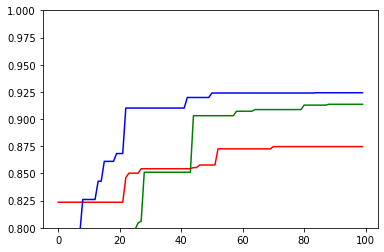

In [42]:
plt.figure()
plt.plot(fi,color='red',label="MGAH")
plt.plot(ag.bestfi,color='blue',label="MGAH C1")
plt.plot(ag3.bestfi,color='green',label="MGAH C2")
plt.ylim(0.80,1)
plt.show()